## Wavelet Based Source Extraction

Could we perform a source extraction based on an algorithm similar to CLEAN in interferometry, but based on the wavelet decompositon of the image.

In [2]:
import aplpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


INFO: Auto-setting vmin to  3.464e+21 [aplpy.core]
INFO: Auto-setting vmax to  1.493e+23 [aplpy.core]


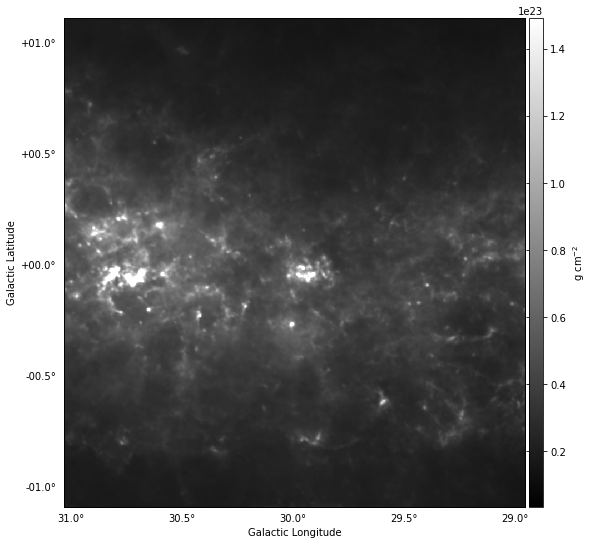

In [6]:
figfile = '/Users/robitaij/postdoc/Herschel/W43_density_galcut_nan.fits'
fig = aplpy.FITSFigure(figfile, convention='calabretta')
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
#fig.ticks.set_minor_frequency(0.1,0.1)
fig.ticks.set_xspacing(0.5)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'g cm$^{-2}$')

In [7]:
from astropy.io import fits

In [8]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

Look for the maximum value in the map and create a "one pixel" model of the map for the source.

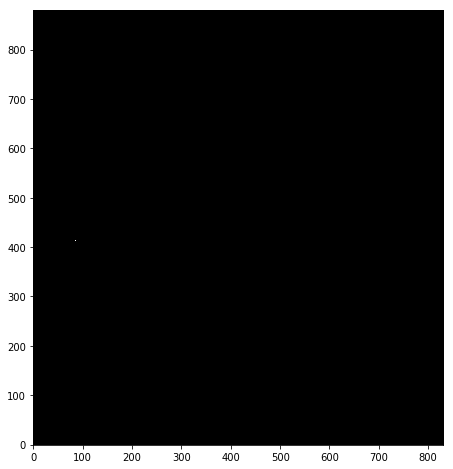

In [9]:
valmax = np.max(im)
indmax = np.where(im == valmax)

model = np.zeros(im.shape)
model[indmax] = valmax

plt.figure(figsize=(8,8))
plt.imshow(model, origin='bottom', cmap='gray')

Look at a typical scale, where sources normally appear clearly (a = 30 pixels) and compare this scale with the model convolved with the same wavelet.

In [10]:
from wavan import uv_plane

Text(0.5,1,u'Subtraction by the model')

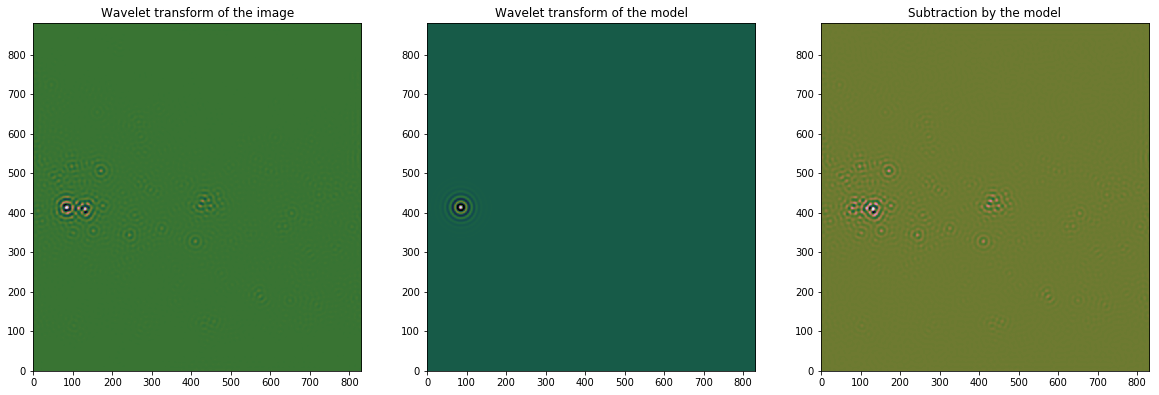

In [23]:
#Wavelet transform of the image at a specific scale

#Scale
a = 30.

x, y, shiftx, shifty, ishiftx, ishifty = uv_plane(im.shape[1],im.shape[0])

#Isotropic wavelet in Fourier space (Halo)
ko= 5.336
wav = np.exp(-0.5*((abs(a*np.sqrt(x**2.+y**2.))**2. - abs(ko))**2.))

#Convolution (in Fourier space)
imFT = np.fft.fft2(im)
imFT= np.roll(imFT,int(shiftx), axis=1)
imFT= np.roll(imFT,int(shifty), axis=0)

WimFT = imFT * wav
WimFT2=np.roll(WimFT,int(ishiftx), axis=1)
WimFT2=np.roll(WimFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wim = np.fft.ifft2(WimFT2).real

modelFT = np.fft.fft2(model)
modelFT= np.roll(modelFT,int(shiftx), axis=1)
modelFT= np.roll(modelFT,int(shifty), axis=0)
WmodFT = modelFT * wav
WmodFT2=np.roll(WmodFT,int(ishiftx), axis=1)
WmodFT2=np.roll(WmodFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wmod = np.fft.ifft2(WmodFT2).real

#Plot
plt.figure(figsize=(20,8))

plt.subplot(131)
plt.imshow(Wim,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the image")
plt.subplot(132)
plt.imshow(Wmod,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the model")

#Model normalisation (not sure why I have to do this)
Wmod = Wmod/Wmod[indmax] * Wim[indmax]

plt.subplot(133)
plt.imshow(Wim - Wmod,origin='below',cmap='cubehelix')
plt.title("Subtraction by the model")

Try again at larger scale

Text(0.5,1,u'Subtraction by the model')

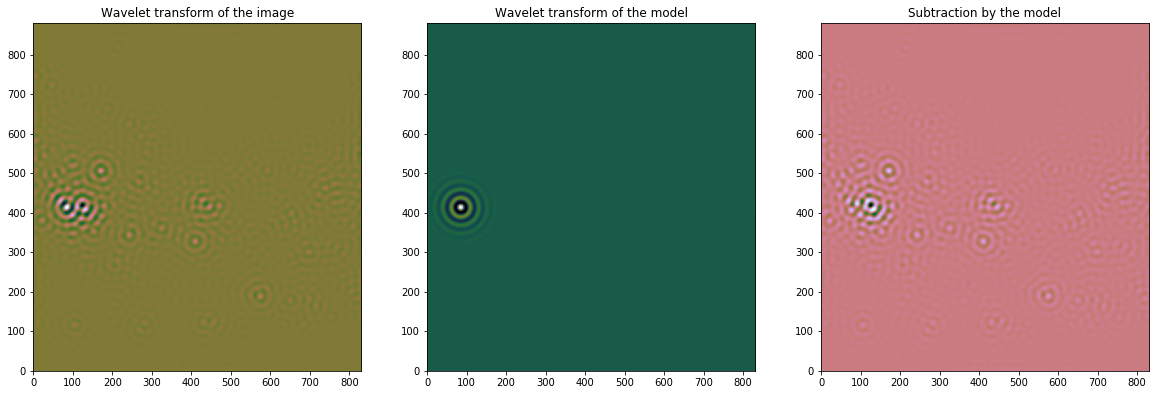

In [25]:
#Wavelet transform of the image at a specific scale

#Scale
a = 50.

x, y, shiftx, shifty, ishiftx, ishifty = uv_plane(im.shape[1],im.shape[0])

#Isotropic wavelet in Fourier space (Halo)
ko= 5.336
wav = np.exp(-0.5*((abs(a*np.sqrt(x**2.+y**2.))**2. - abs(ko))**2.))

#Convolution (in Fourier space)
imFT = np.fft.fft2(im)
imFT= np.roll(imFT,int(shiftx), axis=1)
imFT= np.roll(imFT,int(shifty), axis=0)

WimFT = imFT * wav
WimFT2=np.roll(WimFT,int(ishiftx), axis=1)
WimFT2=np.roll(WimFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wim = np.fft.ifft2(WimFT2).real

modelFT = np.fft.fft2(model)
modelFT= np.roll(modelFT,int(shiftx), axis=1)
modelFT= np.roll(modelFT,int(shifty), axis=0)
WmodFT = modelFT * wav
WmodFT2=np.roll(WmodFT,int(ishiftx), axis=1)
WmodFT2=np.roll(WmodFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wmod = np.fft.ifft2(WmodFT2).real

#Plot
plt.figure(figsize=(20,8))

plt.subplot(131)
plt.imshow(Wim,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the image")
plt.subplot(132)
plt.imshow(Wmod,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the model")

#Model normalisation (not sure why I have to do this)
Wmod = Wmod/Wmod[indmax] * Wim[indmax]

plt.subplot(133)
plt.imshow(Wim - Wmod,origin='below',cmap='cubehelix')
plt.title("Subtraction by the model")

Smaller scale...

Text(0.5,1,u'Subtraction by the model')

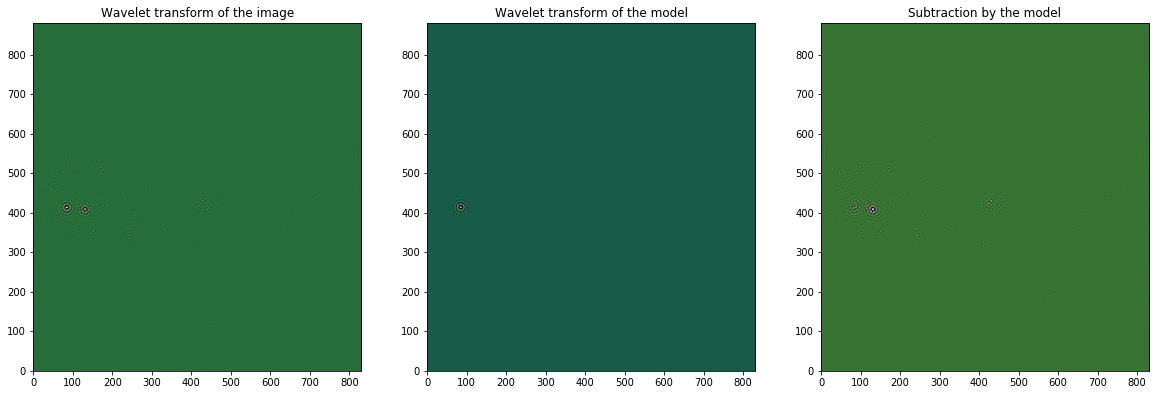

In [29]:
#Wavelet transform of the image at a specific scale

#Scale
a = 17.

x, y, shiftx, shifty, ishiftx, ishifty = uv_plane(im.shape[1],im.shape[0])

#Isotropic wavelet in Fourier space (Halo)
ko= 5.336
wav = np.exp(-0.5*((abs(a*np.sqrt(x**2.+y**2.))**2. - abs(ko))**2.))

#Convolution (in Fourier space)
imFT = np.fft.fft2(im)
imFT= np.roll(imFT,int(shiftx), axis=1)
imFT= np.roll(imFT,int(shifty), axis=0)

WimFT = imFT * wav
WimFT2=np.roll(WimFT,int(ishiftx), axis=1)
WimFT2=np.roll(WimFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wim = np.fft.ifft2(WimFT2).real

modelFT = np.fft.fft2(model)
modelFT= np.roll(modelFT,int(shiftx), axis=1)
modelFT= np.roll(modelFT,int(shifty), axis=0)
WmodFT = modelFT * wav
WmodFT2=np.roll(WmodFT,int(ishiftx), axis=1)
WmodFT2=np.roll(WmodFT2,int(ishifty), axis=0)
#Wavelet coefficients 
Wmod = np.fft.ifft2(WmodFT2).real

#Plot
plt.figure(figsize=(20,8))

plt.subplot(131)
plt.imshow(Wim,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the image")
plt.subplot(132)
plt.imshow(Wmod,origin='below',cmap='cubehelix')
plt.title("Wavelet transform of the model")

#Model normalisation (not sure why I have to do this)
Wmod = Wmod/Wmod[indmax] * Wim[indmax]

plt.subplot(133)
plt.imshow(Wim - Wmod,origin='below',cmap='cubehelix')
plt.title("Subtraction by the model")

Less efficient at smaller scales?

### Conclusion

The next step is to do this iteratively for every scales, sources after sources, and then reconstruct your map from wavelet coefficients. This would provide a map with the most intense sources subtracted. Consequently, we could now separate the sources, the "filaments" and the "turbulent" background.

A map of extracted sources could probably be reconstructed from the wavelet transforms of the model map.